In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import datetime

In [2]:
# import cleaned data
age_df = pd.read_csv("output/2019boston_marathon_elevation.csv")
age_df

,Unnamed: 0,BibNumber,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,CountryOfResAbbrev,CountryOfResName,OfficialTime,RankOverall,RankOverGender,Address,Lat_x,Lng_x,Coordinates,Elevation
0,0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,KEN,Kenya,2:07:57,1,1,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340
1,1,6,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,ETH,Ethiopia,2:07:59,2,2,"Ambo, Ethiopia",8.958061,37.932101,"8.9580605, 37.9321008",2376.239258
2,2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,NaN,KEN,Kenya,2:08:07,3,3,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340
3,3,8,"Kandie, Felix",32,M,Iten,NaN,NaN,KEN,Kenya,2:08:54,4,4,"Iten, Kenya",0.673235,35.508314,"0.6732353999999999, 35.5083136",2358.822510
4,4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,NaN,KEN,Kenya,2:08:55,5,5,"Keringet, Kenya",-0.469779,36.000324,"-0.4697789, 36.0003237",2272.979492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,30798,"Shubert, Mackenzie",28,F,Malden,MA,Massachusetts,USA,United States of America,6:16:56,26636,11975,"Malden, MA",42.425096,-71.066163,"42.4250964, -71.066163",3.172937
26513,26513,25235,"Mcsweeney, Nikki",33,F,Natick,MA,Massachusetts,USA,United States of America,6:18:13,26637,11976,"Natick, MA",42.277528,-71.346809,"42.2775281, -71.3468091",51.877419
26514,26514,25616,"Genest, Debbie",44,F,Harrisville,RI,Rhode Island,USA,United States of America,6:21:19,26640,11977,"Harrisville, RI",41.965654,-71.674511,"41.96565390000001, -71.6745112",97.678200
26515,26515,23316,"Lewandowski, Denise",50,F,Boiling Springs,PA,Pennsylvania,USA,United States of America,6:22:27,26641,11978,"Boiling Springs, PA",40.149812,-77.128313,"40.14981239999999, -77.1283133",147.602921


In [3]:
# create lists of data
time_data = age_df["OfficialTime"]
age_data = age_df["AgeOnRaceDay"]

In [4]:
# create list of finishing times in seconds
seconds = []

for time in time_data:
    date_time = datetime.datetime.strptime(time, "%H:%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    num_seconds = a_timedelta.total_seconds()
    seconds.append(num_seconds)

In [5]:
# add seconds to dataframe
age_df["Seconds"] = seconds

In [6]:
# create time (in seconds) data to use for plot
second_data = age_df["Seconds"]

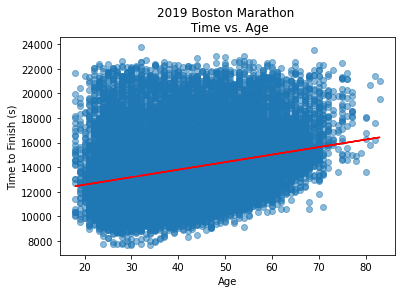

Linear Regression Model: y = 61.1104x + 11351.84
The correlation coefficient is 0.26


In [11]:
# create plot with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(age_data, second_data)
regress_values = age_data * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

plt.scatter(age_data, second_data, marker="o", alpha=0.5)
plt.plot(age_data, regress_values, "r-")
plt.title(f"2019 Boston Marathon \n Time vs. Age")
plt.xlabel("Age")
plt.ylabel("Time to Finish (s)")
plt.savefig("output/plot_age_regression.png")
plt.show()

correlation = st.pearsonr(age_data, second_data)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

In [8]:
# get stats on ages
age_info = age_df["AgeOnRaceDay"].describe()
age_info

count    26517.000000
mean        42.798657
std         11.537745
min         18.000000
25%         34.000000
50%         43.000000
75%         51.000000
max         83.000000
Name: AgeOnRaceDay, dtype: float64

In [12]:
# create bins
bins = [0, 29, 39, 49, 59, 69, 79, 89]

# create bin names
group_names = ["<30", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]

In [35]:
# Slice the data and place it into bins
pd.cut(age_df["AgeOnRaceDay"], bins, labels=group_names).head()

0    30-39
1      <30
2    30-39
3    30-39
4      <30
Name: AgeOnRaceDay, dtype: category
Categories (7, object): [<30 < 30-39 < 40-49 < 50-59 < 60-69 < 70-79 < 80-89]

In [17]:
# add bin labels as a column in the data frame
age_df["AgeGroup"] = pd.cut(age_df["AgeOnRaceDay"], bins, labels=group_names)
age_df.head()

,Unnamed: 0,BibNumber,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,CountryOfResAbbrev,CountryOfResName,OfficialTime,RankOverall,RankOverGender,Address,Lat_x,Lng_x,Coordinates,Elevation,Seconds,AgeGroup
0,0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,KEN,Kenya,2:07:57,1,1,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340,7677.0,30-39
1,1,6,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,ETH,Ethiopia,2:07:59,2,2,"Ambo, Ethiopia",8.958061,37.932101,"8.9580605, 37.9321008",2376.239258,7679.0,<30
2,2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,NaN,KEN,Kenya,2:08:07,3,3,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340,7687.0,30-39
3,3,8,"Kandie, Felix",32,M,Iten,NaN,NaN,KEN,Kenya,2:08:54,4,4,"Iten, Kenya",0.673235,35.508314,"0.6732353999999999, 35.5083136",2358.822510,7734.0,30-39
4,4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,NaN,KEN,Kenya,2:08:55,5,5,"Keringet, Kenya",-0.469779,36.000324,"-0.4697789, 36.0003237",2272.979492,7735.0,<30


In [21]:
# Create a GroupBy object based upon Age Group
age_group = age_df.groupby("AgeGroup")

# Find how many rows fall into each bin
print(age_group["BibNumber"].count())

AgeGroup
<30      4025
30-39    6676
40-49    8067
50-59    5405
60-69    2115
70-79     217
80-89      12
Name: BibNumber, dtype: int64


In [23]:
# Get the average of each column within the GroupBy object
age_group[["Seconds"]].mean().round()

,Seconds
AgeGroup,
<30,13487.0
30-39,13290.0
40-49,13766.0
50-59,14614.0
60-69,15772.0
70-79,17303.0
80-89,17910.0


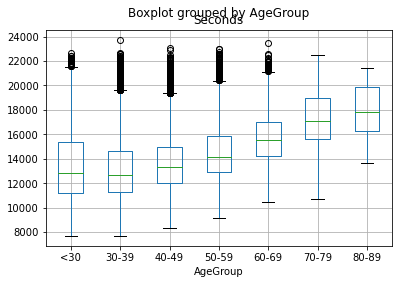

In [28]:
# Create a boxplot to compare means
age_df.boxplot("Seconds", by="AgeGroup")
plt.savefig("output/plot_age_boxplot.png")


In [30]:
# break data into groups
age30 = age_df[age_df["AgeGroup"] == "<30"]["Seconds"]
age30_39 = age_df[age_df["AgeGroup"] == "30-39"]["Seconds"]
age40_49 = age_df[age_df["AgeGroup"] == "40-49"]["Seconds"]
age50_59 = age_df[age_df["AgeGroup"] == "50-59"]["Seconds"]
age60_69 = age_df[age_df["AgeGroup"] == "60-69"]["Seconds"]
age70_79 = age_df[age_df["AgeGroup"] == "70-79"]["Seconds"]
age80_89 = age_df[age_df["AgeGroup"] == "80-89"]["Seconds"]

In [33]:
# run ANOVA test
st.f_oneway(age30, age30_39, age40_49, age50_59, age60_69, age70_79, age80_89)

F_onewayResult(statistic=405.01583875744336, pvalue=0.0)